In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

List of all genres

In [144]:
genres = ["Action", "Adventure", "Animation", "Children", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "IMAX", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western", "(no genres listed)"]

----
## Processing movies data
Load movies to pandas dataframe

In [145]:
movies_df = pd.read_csv('../data/movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [146]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  87585 non-null  int64 
 1   title    87585 non-null  object
 2   genres   87585 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


Extract year and remove it from title and convert genres to list

In [147]:
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)')
movies_df['title'] = movies_df['title'].str.replace(r'\((\d{4})\)', '', regex=True)
movies_df['genres'] = movies_df['genres'].str.split('|')

One hot encode the genres, this will allow for easier processing later

In [148]:
for genre in genres:
    movies_df[genre] = movies_df['genres'].apply(lambda x: 1 if genre in x else 0)
movies_df.drop(columns=['genres'], inplace=True)

In [149]:
movies_df.head()

,movieId,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,(no genres listed)
0,1,Toy Story,1995,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,Waiting to Exhale,1995,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5,Father of the Bride Part II,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Mean is the percentage of movies in each genre

In [150]:
movies_df.drop(columns=['movieId']).describe()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,(no genres listed)
count,87585.000000,87585.000000,87585.000000,87585.000000,87585.000000,87585.000000,87585.000000,87585.000000,87585.000000,87585.000000,87585.000000,87585.000000,87585.000000,87585.000000,87585.000000,87585.000000,87585.000000,87585.000000,87585.000000,87585.000000
mean,0.110384,0.061677,0.052715,0.051607,0.264018,0.079648,0.106902,0.390192,0.043969,0.004030,0.098807,0.002226,0.012091,0.045818,0.118388,0.056026,0.134989,0.026546,0.019364,0.080836
std,0.313370,0.240570,0.223464,0.221234,0.440811,0.270750,0.308990,0.487796,0.205027,0.063357,0.298404,0.047133,0.109293,0.209092,0.323069,0.229972,0.341714,0.160752,0.137802,0.272584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


----
## Processing ratings data
Load ratings to pandas dataframe

In [151]:
ratings_df = pd.read_csv('../data/ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


Drop timestamp since it is not needed for our analysis

In [152]:
ratings_df.drop(columns=['timestamp'], inplace=True)
ratings_df.head()

,userId,movieId,rating
0,1,17,4.0
1,1,25,1.0
2,1,29,2.0
3,1,30,5.0
4,1,32,5.0


In [153]:
ratings_df.drop(columns=['userId', 'movieId']).describe()

,rating
count,3.200020e+07
mean,3.540396e+00
std,1.058986e+00
min,5.000000e-01
25%,3.000000e+00
50%,3.500000e+00
75%,4.000000e+00
max,5.000000e+00


In [154]:
ratings_df_to_merge = ratings_df.drop(columns=['userId'])
ratings_df_to_merge = ratings_df_to_merge.groupby('movieId')['rating'].mean().reset_index()
merged_df = pd.merge(movies_df, ratings_df_to_merge, on='movieId', how='left')

In [155]:
merged_df.head(5)

,movieId,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,(no genres listed),rating
0,1,Toy Story,1995,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3.897438
1,2,Jumanji,1995,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3.275758
2,3,Grumpier Old Men,1995,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,3.139447
3,4,Waiting to Exhale,1995,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,2.845331
4,5,Father of the Bride Part II,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3.059602


In [156]:
# get 25%, 50%, 75% percentiles
percentiles = merged_df['rating'].quantile([0.25, 0.75]).values.tolist()

In [157]:
merged_df['low_rating'] = merged_df['rating'].apply(lambda x: 1 if x <= percentiles[0] else 0)
merged_df['medium_rating'] = merged_df['rating'].apply(lambda x: 1 if percentiles[0] < x <= percentiles[1] else 0)
merged_df['high_rating'] = merged_df['rating'].apply(lambda x: 1 if percentiles[1] < x else 0)

In [158]:
merged_df.head()

,movieId,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Romance,Sci-Fi,Thriller,War,Western,(no genres listed),rating,low_rating,medium_rating,high_rating
0,1,Toy Story,1995,0,1,1,1,1,0,0,...,0,0,0,0,0,0,3.897438,0,0,1
1,2,Jumanji,1995,0,1,0,1,0,0,0,...,0,0,0,0,0,0,3.275758,0,1,0
2,3,Grumpier Old Men,1995,0,0,0,0,1,0,0,...,1,0,0,0,0,0,3.139447,0,1,0
3,4,Waiting to Exhale,1995,0,0,0,0,1,0,0,...,1,0,0,0,0,0,2.845331,0,1,0
4,5,Father of the Bride Part II,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,3.059602,0,1,0


In [159]:
movie_rec_df = merged_df.drop(columns=['title', 'year', 'rating'])
# set index to movieId
movie_rec_df.set_index('movieId', inplace=True)
movie_rec_df.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,(no genres listed),low_rating,medium_rating,high_rating
movieId,,,,,,,,,,,,,,,,,,,,,
1,0,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Data normalization - standarization using StandardScaler

StandardScaler transforms features to have mean=0 and standard deviation=1


In [160]:
# Create a copy of dataframe for normalization
movie_rec_df_normalized = movie_rec_df.copy()

# Apply StandardScaler to all feature columns (genres)
scaler = StandardScaler()
feature_columns = genres + ['low_rating', 'medium_rating', 'high_rating']
movie_rec_df_normalized[feature_columns] = scaler.fit_transform(movie_rec_df[feature_columns])

# Display normalized data
movie_rec_df_normalized.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,(no genres listed),low_rating,medium_rating,high_rating
movieId,,,,,,,,,,,,,,,,,,,,,
1,-0.352251,3.900441,4.239117,4.286865,1.669618,-0.294179,-0.345974,-0.799913,4.662987,-0.063614,...,-0.219131,-0.366450,-0.24362,-0.395037,-0.165135,-0.140522,-0.296555,-0.563527,-1.010202,1.894520
2,-0.352251,3.900441,-0.235898,4.286865,-0.598940,-0.294179,-0.345974,-0.799913,4.662987,-0.063614,...,-0.219131,-0.366450,-0.24362,-0.395037,-0.165135,-0.140522,-0.296555,-0.563527,0.989901,-0.527838
3,-0.352251,-0.256381,-0.235898,-0.233271,1.669618,-0.294179,-0.345974,-0.799913,-0.214455,-0.063614,...,-0.219131,2.728885,-0.24362,-0.395037,-0.165135,-0.140522,-0.296555,-0.563527,0.989901,-0.527838
4,-0.352251,-0.256381,-0.235898,-0.233271,1.669618,-0.294179,-0.345974,1.250135,-0.214455,-0.063614,...,-0.219131,2.728885,-0.24362,-0.395037,-0.165135,-0.140522,-0.296555,-0.563527,0.989901,-0.527838
5,-0.352251,-0.256381,-0.235898,-0.233271,1.669618,-0.294179,-0.345974,-0.799913,-0.214455,-0.063614,...,-0.219131,-0.366450,-0.24362,-0.395037,-0.165135,-0.140522,-0.296555,-0.563527,0.989901,-0.527838


K-means clustering

applying k-means algorithm to group similar movies based on their genres and ratings.

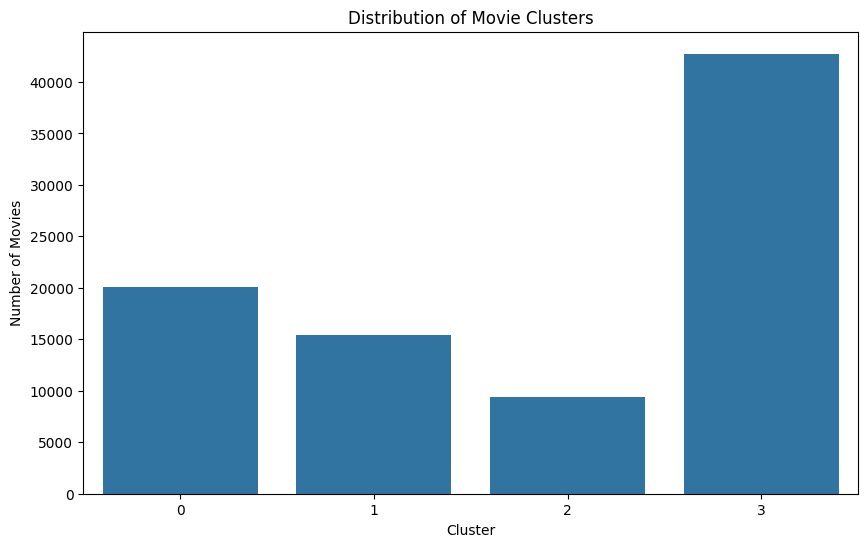

In [161]:
# Set number of clusters
k = 4
seed = 42

# Apply k-means to normalized data
kmeans = KMeans(n_clusters=k, random_state=seed, n_init=10)
movie_rec_df_normalized['cluster'] = kmeans.fit_predict(movie_rec_df_normalized[feature_columns])

# Display distribution of clusters
plt.figure(figsize=(10, 6))
plt.title('Distribution of Movie Clusters')
sns.countplot(x='cluster', data=movie_rec_df_normalized)
plt.xlabel('Cluster')
plt.ylabel('Number of Movies')
plt.show()

In [162]:
# Analyze cluster centers to understand what each cluster represents
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=feature_columns)
cluster_centers.index.name = 'Cluster'
print("Cluster centers (showing most distinctive features for each cluster):")
cluster_centers.head()

Cluster centers (showing most distinctive features for each cluster):


,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,(no genres listed),low_rating,medium_rating,high_rating
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.107894,0.028718,-0.038415,0.049505,0.023990,-0.033684,-0.344523,-0.178476,0.025081,-0.043174,...,0.025990,-0.052399,0.169624,0.120228,-0.059167,0.012733,0.067620,1.752294,-1.010202,-0.527838
1,-0.064707,0.007886,0.068339,0.014215,0.057713,0.018023,-0.345974,0.337155,0.014625,0.058232,...,-0.001331,0.127518,-0.074086,-0.093565,0.078208,-0.034600,0.061858,-0.563527,-1.010202,1.894520
2,-0.334170,-0.214609,-0.200018,-0.207659,-0.534914,-0.249955,2.890393,-0.723864,-0.207676,-0.063614,...,-0.203792,-0.356192,-0.225025,-0.383462,-0.062719,-0.135867,-0.296555,-0.257584,-0.112144,0.422563
3,0.045792,0.030635,0.037174,0.017067,0.084988,0.064029,-0.345974,0.120663,0.028396,0.013201,...,0.032874,0.056579,-0.003711,0.061195,0.013313,0.036234,0.010829,-0.563527,0.863452,-0.527838


In [163]:
# show cluster 0 as an example
cluster_example = 0
cluster_movies = movie_rec_df_normalized[movie_rec_df_normalized['cluster'] == cluster_example].join(
    movies_df.set_index('movieId')[['title', 'year']], on='movieId', how='left')
print(f"Sample of movies in cluster {cluster_example}:")
cluster_movies[['title', 'year']].head(10)

Sample of movies in cluster 0:


,title,year
movieId,,
56,Kids of the Round Table,1995
65,Bio-Dome,1996
66,Lawnmower Man 2: Beyond Cyberspace,1996
71,Fair Game,1995
75,Big Bully,1996
87,Dunston Checks In,1996
93,Vampire in Brooklyn,1995
102,Mr. Wrong,1996
109,Headless Body in Topless Bar,1995


In [164]:
# Calculate most common genres in each cluster
cluster_genre_profiles = pd.DataFrame()
for i in range(k):
    movies_in_cluster = movie_rec_df_normalized[movie_rec_df_normalized['cluster'] == i]
    genre_profile = movies_in_cluster[genres].mean().sort_values(ascending=False)
    cluster_genre_profiles[f'Cluster {i}'] = genre_profile

print("Most common genres in each cluster (sorted):")
cluster_genre_profiles.head(5)  # Show top 5 genres per cluster

Most common genres in each cluster (sorted):


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Horror,0.351234,-0.201551,-0.309624,-0.024535
Sci-Fi,0.169624,-0.074086,-0.225025,-0.003711
Thriller,0.120228,-0.093565,-0.383462,0.061195
Action,0.107894,-0.064707,-0.334170,0.045792
(no genres listed),0.067620,0.061858,-0.296555,0.010829


In [165]:
test_user_id = 1
test_user_ratings = ratings_df[ratings_df['userId'] == test_user_id].drop(columns=['userId'])
# remove first  row from the test_user_ratings dataframe
dropped_row = test_user_ratings.iloc[3]
dropped_movie_id = dropped_row['movieId']
print(dropped_movie_id)
test_user_ratings = test_user_ratings.drop(test_user_ratings.index[0])
test_user_ratings

30.0


,movieId,rating
1,25,1.0
2,29,2.0
3,30,5.0
4,32,5.0
5,34,2.0
...,...,...
136,2985,5.0
137,2997,4.0
138,3030,4.0
139,3078,2.0


In [166]:
test_user_movies = movie_rec_df_normalized.loc[test_user_ratings['movieId']]

# multiply the test_user_movies elements by the test_user_ratings elements
profile = test_user_movies.T.dot(test_user_ratings['rating'].values)
profile[['low_rating', 'medium_rating', 'high_rating']] = profile[['low_rating', 'medium_rating', 'high_rating']] / (2 *profile[['low_rating', 'medium_rating', 'high_rating']].sum())

# normalize all other values
norm = np.linalg.norm(profile)
for genre in genres:
    profile[genre] = profile[genre] / norm


In [167]:
test_user_id = 2
test_user_ratings = ratings_df[ratings_df['userId'] == test_user_id].drop(columns=['userId'])
# remove first  row from the test_user_ratings dataframe
dropped_row = test_user_ratings.iloc[3]
dropped_movie_id = dropped_row['movieId']
print(dropped_movie_id)
test_user_ratings = test_user_ratings.drop(test_user_ratings.index[0])
test_user_movies = movie_rec_df_normalized.loc[test_user_ratings['movieId']]

# multiply the test_user_movies elements by the test_user_ratings elements
profile_2 = test_user_movies.T.dot(test_user_ratings['rating'].values)
profile_2[['low_rating', 'medium_rating', 'high_rating']] = profile[['low_rating', 'medium_rating', 'high_rating']] / (2 *profile_2[['low_rating', 'medium_rating', 'high_rating']].sum())

# normalize all other values
norm = np.linalg.norm(profile)
for genre in genres:
    profile_2[genre] = profile_2[genre] / norm

48.0


In [168]:
profile

Action                  0.083696
Adventure               0.132534
Animation              -0.130225
Children               -0.093416
Comedy                  0.100327
Crime                   0.093501
Documentary            -0.180141
Drama                   0.378560
Fantasy                -0.009378
Film-Noir               0.053072
Horror                 -0.141597
IMAX                   -0.026077
Musical                -0.061072
Mystery                 0.076778
Romance                 0.188572
Sci-Fi                  0.191082
Thriller               -0.034941
War                     0.416310
Western                -0.020808
(no genres listed)     -0.163710
low_rating             -1.016473
medium_rating          -1.449714
high_rating             2.966186
cluster               599.000000
dtype: float64

Using k-means clustering in recommendations

In [169]:
# Identify the most frequent cluster in the user's rated movies
user_preferred_cluster = test_user_movies['cluster'].mode()[0]
print(f"User's most frequently rated cluster: {user_preferred_cluster}")

User's most frequently rated cluster: 3


In [170]:
# build ranking based on the profile
ranking = movie_rec_df_normalized.copy()
ranking['score'] = 0
for genre in genres:
    ranking['score'] += ranking[genre] * profile[genre]
for rating in ['low_rating', 'medium_rating', 'high_rating']:
    ranking['score'] += ranking[rating] * profile[rating]

# add simple cluster-based boost (add 0.5 points to movies in user's preferred cluster)
ranking['score'] += (ranking['cluster'] == user_preferred_cluster) * 0.5

ranking = ranking.sort_values(by='score', ascending=False)

In [171]:
ranking

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,Sci-Fi,Thriller,War,Western,(no genres listed),low_rating,medium_rating,high_rating,cluster,score
movieId,,,,,,,,,,,,,,,,,,,,,
26236,2.838885,3.900441,-0.235898,-0.233271,1.669618,-0.294179,-0.345974,1.250135,-0.214455,-0.063614,...,-0.243620,-0.395037,6.055656,-0.140522,-0.296555,-0.563527,-1.010202,1.894520,1,12.230478
212761,2.838885,-0.256381,-0.235898,-0.233271,-0.598940,3.399292,-0.345974,1.250135,-0.214455,-0.063614,...,-0.243620,-0.395037,6.055656,-0.140522,-0.296555,-0.563527,-1.010202,1.894520,1,11.797305
897,-0.352251,3.900441,-0.235898,-0.233271,-0.598940,-0.294179,-0.345974,1.250135,-0.214455,-0.063614,...,-0.243620,-0.395037,6.055656,-0.140522,-0.296555,-0.563527,-1.010202,1.894520,1,11.735796
75994,-0.352251,3.900441,-0.235898,-0.233271,-0.598940,-0.294179,-0.345974,1.250135,-0.214455,-0.063614,...,-0.243620,-0.395037,6.055656,-0.140522,-0.296555,-0.563527,-1.010202,1.894520,1,11.735796
140295,2.838885,3.900441,4.239117,-0.233271,-0.598940,-0.294179,-0.345974,1.250135,-0.214455,-0.063614,...,4.104752,-0.395037,6.055656,-0.140522,-0.296555,-0.563527,-1.010202,1.894520,1,11.667326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116253,-0.352251,-0.256381,-0.235898,4.286865,-0.598940,-0.294179,2.890393,-0.799913,-0.214455,-0.063614,...,-0.243620,-0.395037,-0.165135,-0.140522,-0.296555,-0.563527,0.989901,-0.527838,2,-4.407934
281774,-0.352251,-0.256381,4.239117,4.286865,-0.598940,-0.294179,2.890393,-0.799913,-0.214455,-0.063614,...,-0.243620,-0.395037,-0.165135,-0.140522,-0.296555,-0.563527,0.989901,-0.527838,2,-4.437422
58879,-0.352251,-0.256381,-0.235898,-0.233271,-0.598940,-0.294179,2.890393,-0.799913,-0.214455,-0.063614,...,-0.243620,-0.395037,-0.165135,-0.140522,-0.296555,-0.563527,0.989901,-0.527838,2,-4.544476


In [172]:
recommended_movies = ranking.join(movies_df.set_index('movieId'), on='movieId', how='left', rsuffix='_movie')
recommended_movies = recommended_movies[['title', 'year', 'cluster', 'score']]
print("Top recommendations:")
recommended_movies.head(10)

Top recommendations:


,title,year,cluster,score
movieId,,,,
26236,"White Sun of the Desert, The (Beloe solntse pu...",1970,1,12.230478
212761,Kawashima Yoshiko: The Last Princess of Manchu...,1990,1,11.797305
897,For Whom the Bell Tolls,1943,1,11.735796
75994,"Buccaneer, The",1958,1,11.735796
140295,Mobile Suit Gundam III: Encounters in Space,1982,1,11.667326
49530,Blood Diamond,2006,1,11.662278
8690,Slaughterhouse-Five,1972,1,11.659674
2890,Three Kings,1999,1,11.646784
53226,"Great War, The (Grande guerra, La)",1959,1,11.646784


In [173]:
# get dropped movie position in the ranking
dropped_movie_position = ranking[ranking.index == dropped_movie_id]
dropped_movie_position

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,Sci-Fi,Thriller,War,Western,(no genres listed),low_rating,medium_rating,high_rating,cluster,score
movieId,,,,,,,,,,,,,,,,,,,,,
48,-0.352251,-0.256381,4.239117,4.286865,-0.59894,-0.294179,-0.345974,1.250135,-0.214455,-0.063614,...,-0.24362,-0.395037,-0.165135,-0.140522,-0.296555,-0.563527,0.989901,-0.527838,3,-2.553454
